# Experimento: Grid Search em Taxa de Aprendizado e Momento

Neste experimento, avaliamos como diferentes combinações de **taxa de aprendizado (learning rate)** e **momento (momentum)** afetam o desempenho de uma rede neural simples usando o dataset Fashion MNIST.

## 1. Imports
Importa-se as bibliotecas necessárias para construção e treinamento do modelo.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError

## 2. Carregamento e pré-processamento dos dados
Carrega e prepara o conjunto Fashion MNIST.

In [2]:
(x_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_train = x_train[:10000]
y_train = y_train[:10000]
y_train = tf.keras.utils.to_categorical(y_train, 10)

## 3. Definição dos hiperparâmetros para grid search
Define os valores de `learning_rate` e `momentum` a serem testados.

In [3]:
learning_rates = [0.001, 0.01, 0.1]
momentums = [0.0, 0.5, 0.9]

## 4. Construção do modelo
Cria um modelo `Sequential` com uma camada oculta e ReLU.

In [4]:
def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation='relu', kernel_initializer=GlorotUniform(seed=0)),
        Dense(10, activation='softmax')
    ])
    return model

## 5. Treinamento com grid search
Executa o treinamento e plota as curvas de perda.


Testando LR=0.001, Momentum=0.0


c:\Users\emanu\Documents\Trabalho do Gustavo\icctrab\MLP_Backpropagation_Projeto\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Testando LR=0.001, Momentum=0.5

Testando LR=0.001, Momentum=0.9

Testando LR=0.01, Momentum=0.0

Testando LR=0.01, Momentum=0.5

Testando LR=0.01, Momentum=0.9

Testando LR=0.1, Momentum=0.0

Testando LR=0.1, Momentum=0.5

Testando LR=0.1, Momentum=0.9


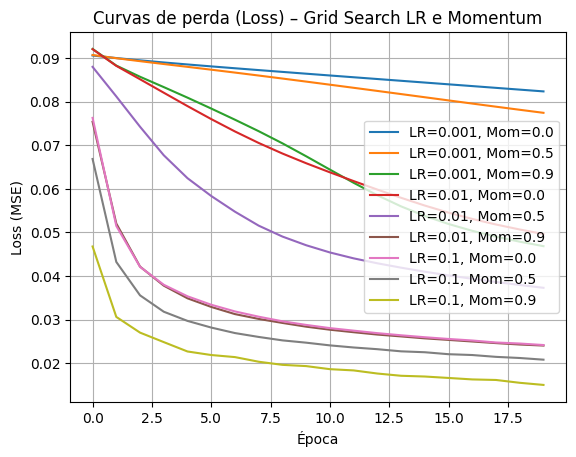

In [5]:
loss_fn = MeanSquaredError()
results = {}

for lr in learning_rates:
    for mom in momentums:
        print(f"\nTestando LR={lr}, Momentum={mom}")
        model = build_model()
        optimizer = SGD(learning_rate=lr, momentum=mom)
        model.compile(optimizer=optimizer, loss=loss_fn, metrics=['mse'])
        history = model.fit(x_train, y_train, epochs=20, verbose=0)
        
        loss_curve = history.history['loss']
        results[(lr, mom)] = loss_curve
        
        plt.plot(loss_curve, label=f'LR={lr}, Mom={mom}')

plt.title('Curvas de perda (Loss) – Grid Search LR e Momentum')
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()